In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import biweight_location
from astropy.stats import biweight_scale


res = pd.read_fwf('e:\\Observations\\BTA\\s210613\\result.dat', header = None)
time = pd.read_csv('e:\\Observations\\BTA\\JD.dat', header = None)
n =int(res.shape[1]/3)
med = pd.DataFrame(index=range(n), columns=range(4))
for i in range(n):
    #print(i)
    med.iloc[i][:] = [biweight_location(res[3*i], c=3.), biweight_scale(res[3*i], c=3.), biweight_location(res[3*i+2],c=3.), biweight_scale(res[3*i+2],c=3.)] 

In [65]:
med
#med = med.drop([2,4,5,8,9,14,18,19,20], 0)

,0,1,2,3
0,-1.491125,1.644529,19.739837,0.280849
1,0.450845,0.618081,18.81,0.0
2,0.734339,0.710066,18.781144,0.091107
3,-0.304821,4.032432,20.663992,0.257928
4,-3.039665,3.053115,20.525175,0.225725
5,1.494235,4.364058,21.078291,0.291045
6,0.231112,1.537587,19.659783,0.165046
7,0.710729,1.963291,20.075327,0.21487
8,0.686855,1.878633,20.152284,0.183364


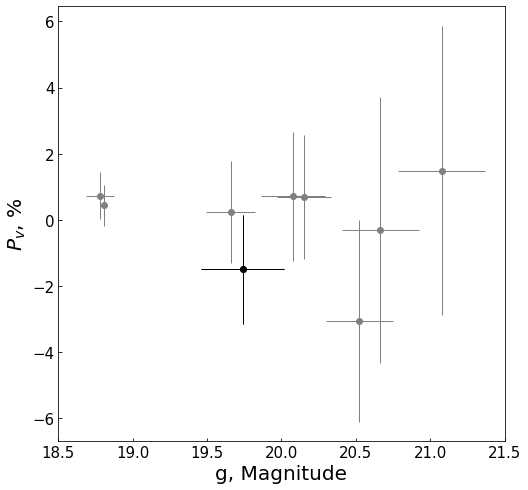

In [135]:
fig = plt.figure(figsize=(8,8))
plt.errorbar(med[2],med[0], med[1],med[3], color='grey', marker='o', ecolor='grey', elinewidth=1,linestyle = None, linewidth=0)
plt.errorbar(med.iloc[0][2],med.iloc[0][0],med.iloc[0][1],med.iloc[0][3], color='black', marker='o', ecolor='black', elinewidth=1)
plt.xlabel('g, Magnitude', size = 20)
plt.ylabel('$P_v$, %', size = 20)
plt.tick_params(direction = 'in', labelsize=15)
#plt.ylim(-1.0,1.0)
plt.xlim(18.5,21.5)
plt.savefig('e:\\Observations\\BTA\\s210613\\fig_P_M.eps')

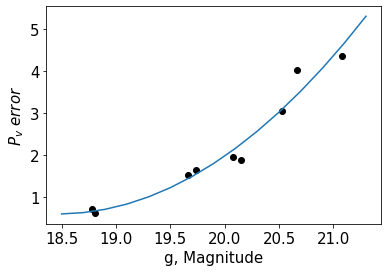

In [2]:
plt.plot(med.iloc[:][2],med.iloc[:][1],'ok')
x = med.iloc[:][2].to_numpy(dtype='float64')
y = med.iloc[:][1].to_numpy(dtype='float64')
p = np.poly1d(np.polyfit(x,y,2))
x1 = np.arange(18.5,21.5,0.2)
plt.plot(x1,p(x1))
plt.xlabel('g, Magnitude', size =15)
plt.ylabel('$P_v~ error$', size =15)
plt.tick_params(labelsize=15)
plt.savefig('e:\\Observations\\BTA\\s210613\\fig_Pv_err.jpg', dpi = 300)
med.to_csv('e:\\Observations\\BTA\\s210613\\med.csv', index=None)

In [57]:
yerr = pd.Series(p(res.iloc[:][2]))
plt.plot()

0

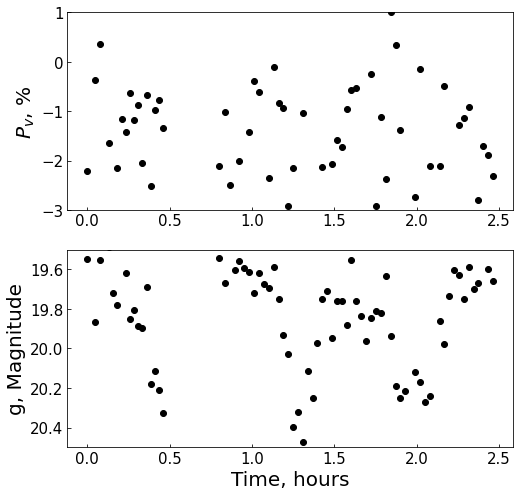

In [67]:
fig = plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot((time-time[0][0])*24, res.iloc[:][0*3],'ok')
#plt.scatter(time, res.iloc[:][6*3])
plt.tick_params(direction = 'in', labelsize=15)
plt.ylim(-3,1)
plt.ylabel('$P_v$, %', size=20)
plt.subplot(2,1,2)
plt.plot((time-time[0][0])*24, res.iloc[:][2],'ko')
#plt.scatter(time1, res.iloc[:-1][7*3-1])
plt.ylim(20.5,19.5)
plt.tick_params(direction = 'in', labelsize=15)
plt.xlabel('Time, hours', size=20)
plt.ylabel('g, Magnitude', size=20)
plt.savefig('e:\\Observations\\BTA\\s210613\\fig_P+M_obj.eps')